In [48]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()

/Users/sola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [50]:
type(boston)

sklearn.utils.Bunch

In [51]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [52]:
# 데이터셋에 대한 설명 확인
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [55]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [56]:
# 데이터셋 객체의 target 배열, 즉 종속 변수인 주택 가격('PRICE')컬럼을 boston_df에 추가
boston_df['PRICE']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
print('보스톤 주택 가격 데이터셋 크기: ', boston_df.shape)

#데이터가 506개 있고, 열의 개수가 14이므로 변수가 14개 존재

보스톤 주택 가격 데이터셋 크기:  (506, 14)


In [58]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


14개의 독립 변수(피처)의 의미
CRIM: 지역별 범죄 발생률
ZN: 25,000평방피트를 초과하는 거주 지역 비율
INDUS: 비상업 지역의 넓이 비율
CHAS: 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)
NOX: 일산화질소 농도
RM: 거주할 수 있는 방 개수
AGE: 1940년 이전에 건축된 주택 비율
DIS: 5개 주요 고용센터까지 가중 거리
RAD: 고속도로 접근 용이도
TAX: 10,000달러당 재산세 비율
PTRATIO: 지역의 교사와 학생 수 비율
B: 지역의 흑인 거주 비율
LSTAT: 하위 계층의 비율
PRICE(MEDV): 본인 소유 주택 가격의 중앙값


In [73]:
boston_df=pd.read_csv('final_data1.csv')

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
#X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis = 1, inplace = False) #price 컬럼 삭제하고 나머지 애들을 독립변수로 설정

In [76]:
#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 156)

In [77]:
type(Y_train)

pandas.core.series.Series

In [78]:
type(X_train)

pandas.core.frame.DataFrame

In [79]:
#선형 회귀 분석 : 모델 생성
lr = LinearRegression()

In [80]:
#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [81]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [82]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

# 회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 결과값 YY_test를 이미 알고 있는 상태에서 평가 데이터 YY_test와
# In [13]에서 구한 예측 결과Y_predict의 오차를 계산하여 모델을 평가. 평가 지표 MSE를 구하고mean_squared_error( )
# 구한 값의 제곱근을 계산하여np.sqrt(mse) 평가 지표 RMSE를 구함 그리고 평가 지표 R2 을 구함r2_score( )

MSE : 26.197, RMSE : 5.118
R^2(Variance score) : 0.690


In [83]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  -14.738957472099464
회귀 계수 값:  [-0.2 -7.7  7.4  0.2 -0. ]


# 선형 회귀 분석 모델을 평가 지표를 통해 평가하고 회귀 계수를 확인하여 피처의 영향을 분석
### 정말 중요해...!

In [85]:
#회귀 모델에서 구한 회귀 계수 값(lr.coef)과 피처 이름(X.columns)을 묶어서 Series 자료 형으로 만들고,
#회귀 계수 값을 기준으로 내림차순으로 정렬하여(ascending=False) 확인(sort_ values( ))

coef = pd.Series(data = np.round(lr.coef_, 3), index = X.columns)
coef.sort_values(ascending = False)

RM      7.409
RAD     0.187
TAX    -0.015
CRIM   -0.181
NOX    -7.654
dtype: float64

회귀 모델 결과를 토대로 보스톤 주택 가격에 대한 회귀식
YPRICE = -0.11XCRIM + 0.07XZN + 0.03XINDUS + 3.05XCHAS – 19.80XNOX + 3.35XRM + 0.01XAGE - 1.74XDIS
         + 0.36XRAD - 0.01XTAX - 0.92XPTRATIO + 0.01XB - 0.57XLSTAT + 41.00


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

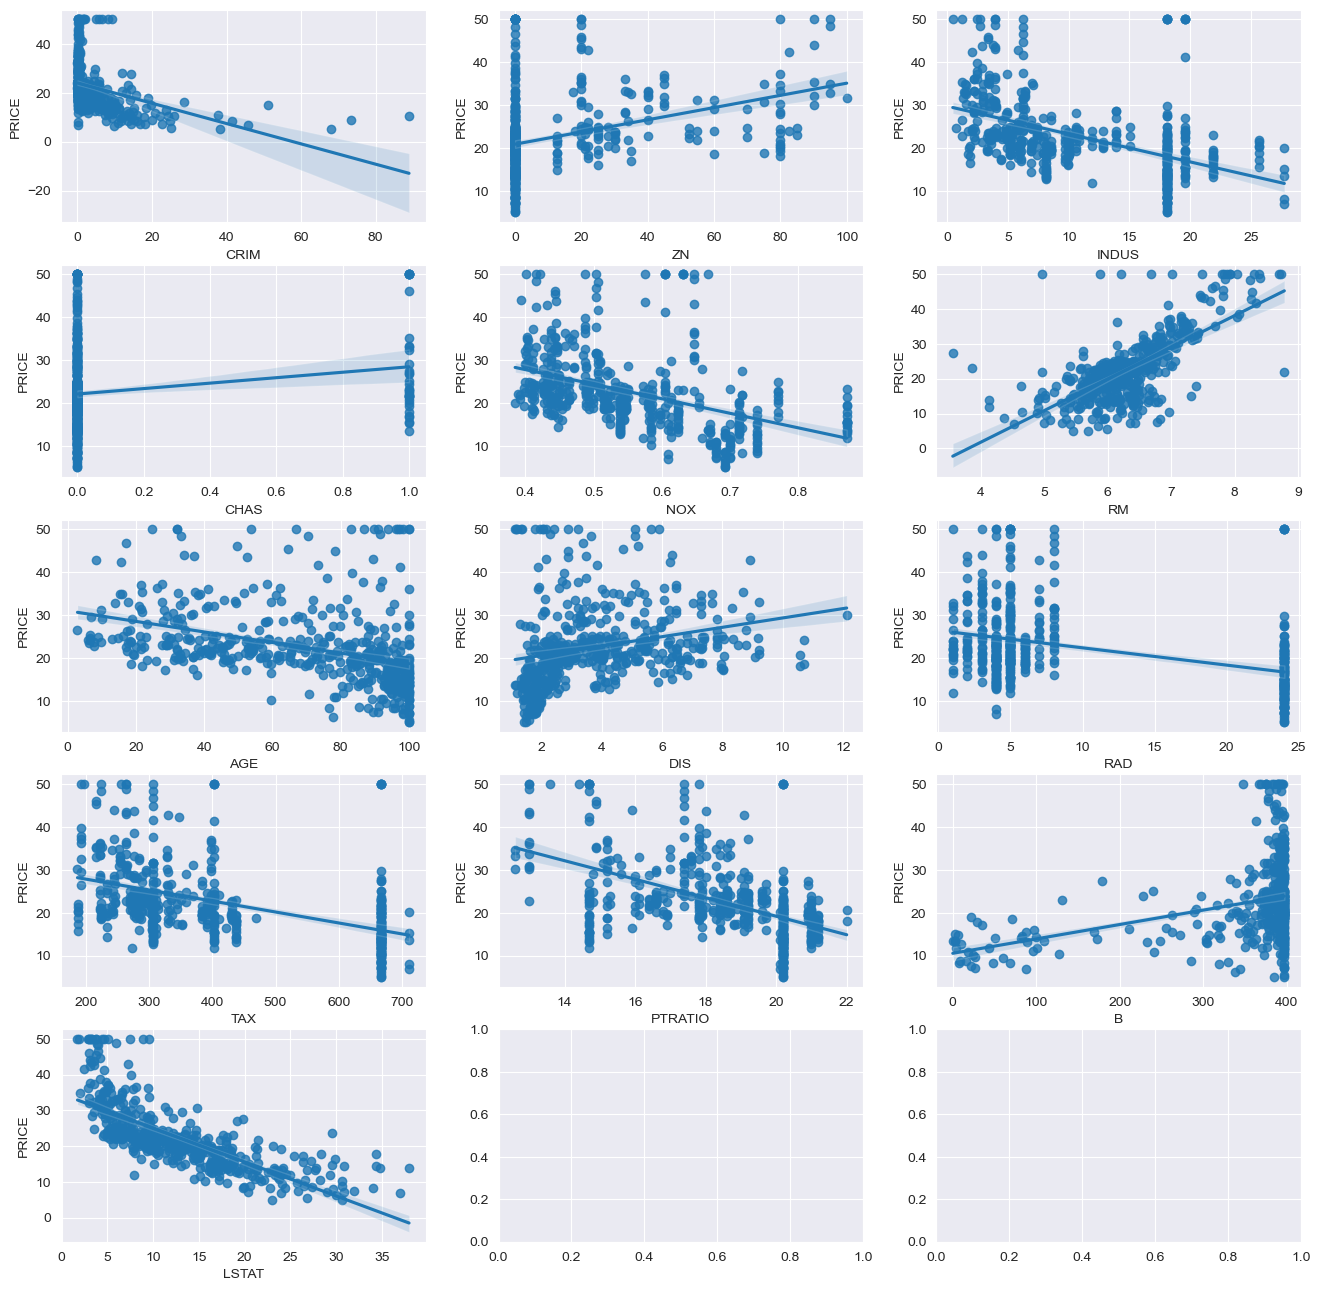

In [71]:
# 독립 변수인 13개 피처와 종속 변수인 주택 가격, PRICE와의 회귀 관계를 보여주는 13개 그래프를 subplots()를
# 사용하여 5행 3열 구조로 모아서 나타냄 seaborn의 regplot()은 산점도 그래프와 선형 회귀 그래프를 함께 그려줌


fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# enumerate() 함수는 기본적으로 인덱스와 원소로 이루어진 터플(tuple)을 만들어줍니다. 따라서 인덱스와 원소를 각각 다른 변수에 할당하고 싶다면 인자 풀기(unpacking)를 해줘야 합니다.
for i, feature in enumerate(x_features):
   row = int(i/3)
   col = i%3
   sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])